In [ ]:
# Cell 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cell 2: Load the dataset
# Make sure 'used_cars.csv' is the correct name of the file you copied into D:\AutoPrice\data\raw\
file_path = '../data/raw/used_cars.csv'
df = pd.read_csv(file_path)

In [ ]:
# Cell 3: Display the first few rows
print("First 5 rows of the dataset:")
df.head() # In Jupyter, df.head() will display the DataFrame nicely

First 5 rows of the dataset:


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
# Cell 4: Get the shape of the dataset (rows, columns)
print("\nShape of the dataset (rows, columns):")
df.shape


Shape of the dataset (rows, columns):


(4009, 12)

In [ ]:
# Cell 5: Get dataset information (columns, data types, non-null counts)
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [ ]:
# Cell 6: Get basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
df.describe()


Basic statistics for numerical columns:


,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [ ]:
# Cell 7: Check for missing values in each column
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [ ]:
# CELL A: Define target_column (Run this cell first!)
import pandas as pd # Assuming df is already loaded from a previous cell

target_column = 'price'
print(f"--- In CELL A: target_column has been set to: '{target_column}' ---")
print(f"--- In CELL A: df['{target_column}'].dtype is: {df[target_column].dtype} ---")

--- In CELL A: target_column has been set to: 'price' ---
--- In CELL A: df['price'].dtype is: object ---


In [ ]:
# Cell 8: Inspect unique values in 'price' to see its current format
print("Original 'price' column (first 20 unique values):")
print(df['price'].unique()[:20])
print(f"Original 'price' Dtype: {df['price'].dtype}")

Original 'price' column (first 20 unique values):
['$10,300' '$38,005' '$54,598' '$15,500' '$34,999' '$14,798' '$31,000'
 '$7,300' '$41,927' '$69,950' '$73,897' '$184,606' '$53,500' '$62,000'
 '$47,998' '$29,990' '$250,000' '$16,800' '$11,000' '$68,750']
Original 'price' Dtype: object


In [ ]:
# Cell 8a: Clean and Convert Target Variable 'price' to Numeric
# Based on your df.info(), 'price' needs cleaning.
# IMPORTANT: Adjust .replace() calls based on the actual format of your 'price' values
# (e.g., if they have '$', ',', currency codes, etc.)

try:
    print(f"DEBUG: At start of Cell 8a/Cell 9, target_column is: '{target_column}'")
except NameError:
    print("DEBUG: target_column is NOT DEFINED at the start of Cell 8a/Cell 9")


if df[target_column].dtype == 'object':
    print(f"\nCleaning '{target_column}' column...")
    df_temp_target = df[target_column].astype(str) # Ensure string type

    df_temp_target = df_temp_target.str.replace('$', '', regex=False) # Remove $
    df_temp_target = df_temp_target.str.replace(',', '', regex=False) # Remove commas
    # Add any other .str.replace() calls if needed for other characters

    df[target_column] = pd.to_numeric(df_temp_target, errors='coerce') # Convert, turn errors into NaN

    print(f"NaNs created in '{target_column}' during conversion: {df[target_column].isnull().sum()}")
    if df[target_column].isnull().any():
        print(f"WARNING: Some '{target_column}' values could not be converted and are now NaN. These rows might need to be dropped or investigated.")
    print(f"'{target_column}' Dtype after cleaning: {df[target_column].dtype}")
else:
    print(f"\n'{target_column}' column is already numeric or not 'object'. Skipping cleaning.")

# Verify the change for the target column
df.info() # Check 'price' Dtype now

DEBUG: At start of Cell 8a/Cell 9, target_column is: 'price'

Cleaning 'price' column...
NaNs created in 'price' during conversion: 0
'price' Dtype after cleaning: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 376.0+ KB


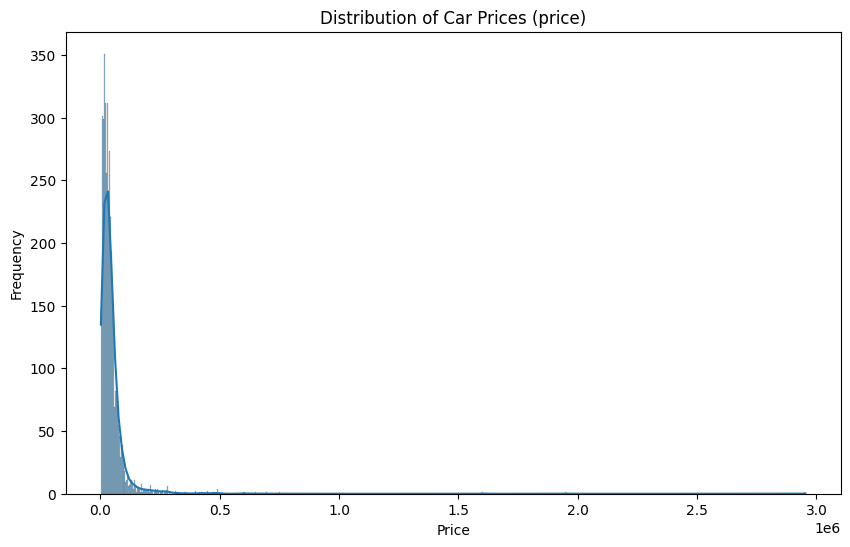

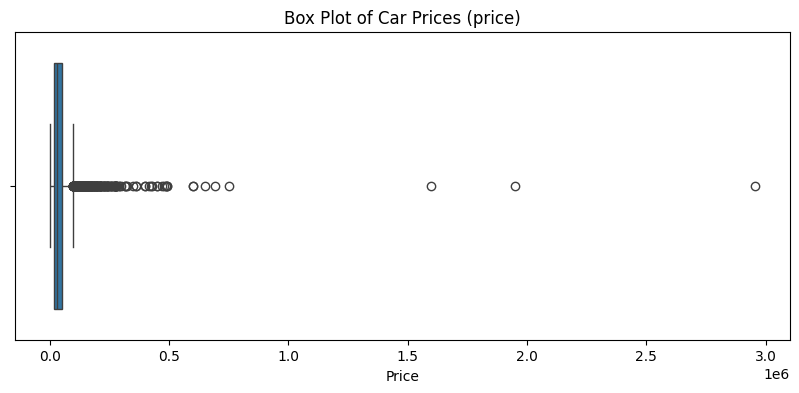

In [ ]:
# Cell 9: Visualize distribution of the (now numeric) Target Variable
if target_column in df.columns and df[target_column].dtype != 'object':
    plt.figure(figsize=(10, 6))
    sns.histplot(df[target_column].dropna(), kde=True) # .dropna() to handle any NaNs from conversion
    plt.title(f'Distribution of Car Prices ({target_column})')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[target_column].dropna())
    plt.title(f'Box Plot of Car Prices ({target_column})')
    plt.xlabel('Price')
    plt.show()
else:
    print(f"Cannot visualize '{target_column}' distribution yet. Ensure it's cleaned and numeric.")

In [ ]:
# Cell 10: Identify a key numerical feature (e.g., milage)
# Your df.info() shows 'milage' is 'object'. We'll clean it next.
numerical_feature_to_clean = 'milage' # This matches your df.info()

print(f"\nNumerical feature to clean and analyze: '{numerical_feature_to_clean}'")
print(f"Original Dtype of '{numerical_feature_to_clean}': {df[numerical_feature_to_clean].dtype}")
print(f"First 5 unique values of '{numerical_feature_to_clean}':", df[numerical_feature_to_clean].unique()[:5])


Numerical feature to clean and analyze: 'milage'
Original Dtype of 'milage': object
First 5 unique values of 'milage': ['51,000 mi.' '34,742 mi.' '22,372 mi.' '88,900 mi.' '9,835 mi.']


In [ ]:
# Cell 10a: Clean and Convert 'milage' to Numeric
# IMPORTANT: Adjust .replace() calls based on the actual format of your 'milage' values
# (e.g., if they have 'km', 'miles', ',', etc.)

if numerical_feature_to_clean in df.columns and df[numerical_feature_to_clean].dtype == 'object':
    print(f"\nCleaning '{numerical_feature_to_clean}' column...")
    df_temp_num_feat = df[numerical_feature_to_clean].astype(str) # Ensure string

    # Example cleaning: remove units and commas
    df_temp_num_feat = df_temp_num_feat.str.replace(' miles', '', regex=False)
    df_temp_num_feat = df_temp_num_feat.str.replace(' km', '', regex=False)
    df_temp_num_feat = df_temp_num_feat.str.replace(',', '', regex=False)
    # Add any other .str.replace() calls if needed

    df[numerical_feature_to_clean] = pd.to_numeric(df_temp_num_feat, errors='coerce')

    print(f"NaNs created in '{numerical_feature_to_clean}' during conversion: {df[numerical_feature_to_clean].isnull().sum()}")
    if df[numerical_feature_to_clean].isnull().any():
         print(f"WARNING: Some '{numerical_feature_to_clean}' values could not be converted and are now NaN.")
    print(f"'{numerical_feature_to_clean}' Dtype after cleaning: {df[numerical_feature_to_clean].dtype}")
else:
    print(f"\n'{numerical_feature_to_clean}' is already numeric, not 'object', or not found. Skipping cleaning.")

# Verify the change
df.info() # Check 'milage' Dtype now


Cleaning 'milage' column...
NaNs created in 'milage' during conversion: 4009
'milage' Dtype after cleaning: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        0 non-null      float64
 4   fuel_type     3839 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      3896 non-null   object 
 10  clean_title   3413 non-null   object 
 11  price         4009 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 376.0+ KB


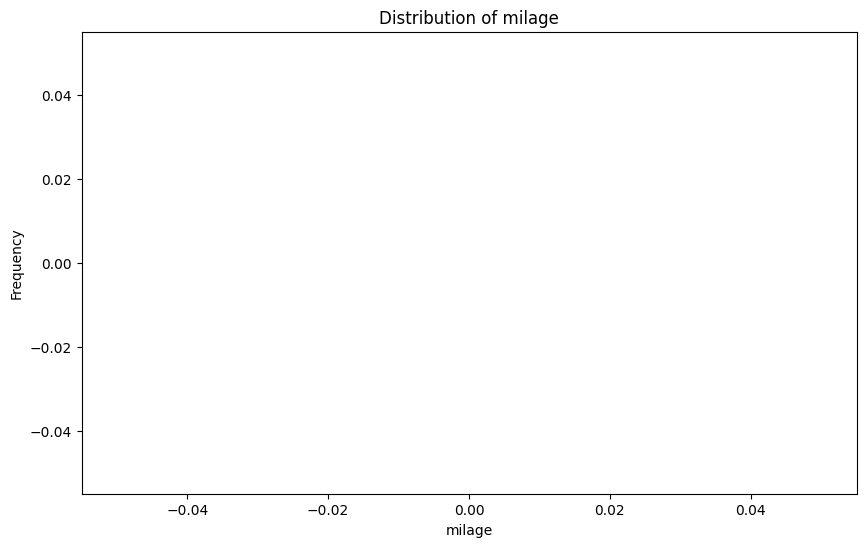

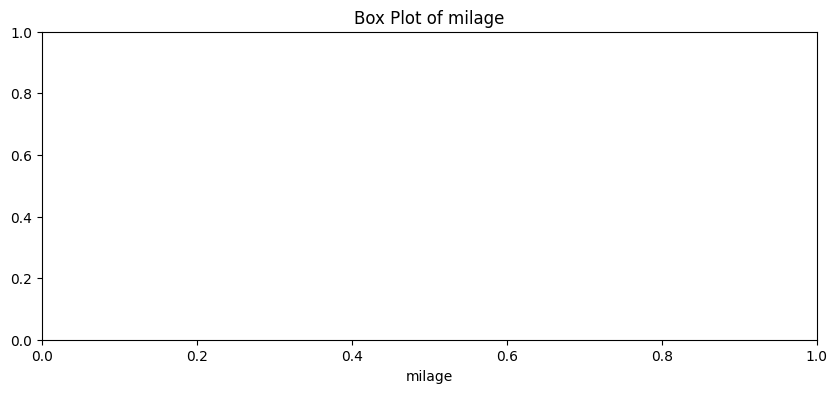

In [ ]:
# Cell 10b: Visualize distribution of the (now numeric) 'milage' feature
if numerical_feature_to_clean in df.columns and df[numerical_feature_to_clean].dtype != 'object':
    plt.figure(figsize=(10, 6))
    sns.histplot(df[numerical_feature_to_clean].dropna(), kde=True)
    plt.title(f'Distribution of {numerical_feature_to_clean}')
    plt.xlabel(numerical_feature_to_clean)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[numerical_feature_to_clean].dropna())
    plt.title(f'Box Plot of {numerical_feature_to_clean}')
    plt.xlabel(numerical_feature_to_clean)
    plt.show()
else:
    print(f"Cannot visualize '{numerical_feature_to_clean}' distribution yet. Ensure it's cleaned and numeric.")

In [ ]:
# Cell 11: Analyze a key categorical feature (e.g., fuel_type)
# Your df.info() shows 'fuel_type' has missing values. We'll handle them next.
categorical_feature_to_analyze = 'fuel_type' # This matches your df.info()

print(f"\nAnalyzing categorical feature: '{categorical_feature_to_analyze}'")
print(f"Value counts for '{categorical_feature_to_analyze}' (before handling NaNs):")
print(df[categorical_feature_to_analyze].value_counts(dropna=False))


Analyzing categorical feature: 'fuel_type'
Value counts for 'fuel_type' (before handling NaNs):
fuel_type
Gasoline          3309
Hybrid             194
NaN                170
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64


In [ ]:
# Cell 11a: Handle Missing Values for 'fuel_type' (using mode) - Updated
if categorical_feature_to_analyze in df.columns and df[categorical_feature_to_analyze].isnull().any():
    print(f"\nHandling missing values for '{categorical_feature_to_analyze}' using mode...")
    mode_val = df[categorical_feature_to_analyze].mode()[0]
    
    # --- MODIFIED LINE HERE ---
    df[categorical_feature_to_analyze] = df[categorical_feature_to_analyze].fillna(mode_val) 
    # --- END OF MODIFIED LINE ---
    
    print(f"Missing values in '{categorical_feature_to_analyze}' filled with mode: '{mode_val}'")
    print(f"Value counts for '{categorical_feature_to_analyze}' (after handling NaNs):")
    print(df[categorical_feature_to_analyze].value_counts(dropna=False))
else:
    print(f"\nNo missing values found in '{categorical_feature_to_analyze}' or column not found.")

# Verify
print("\n--- df.info() after 'fuel_type' missing value handling ---") # Add this line
df.info()


No missing values found in 'fuel_type' or column not found.

--- df.info() after 'fuel_type' missing value handling ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        0 non-null      float64
 4   fuel_type     4009 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      3896 non-null   object 
 10  clean_title   3413 non-null   object 
 11  price         4009 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 376.0+ KB


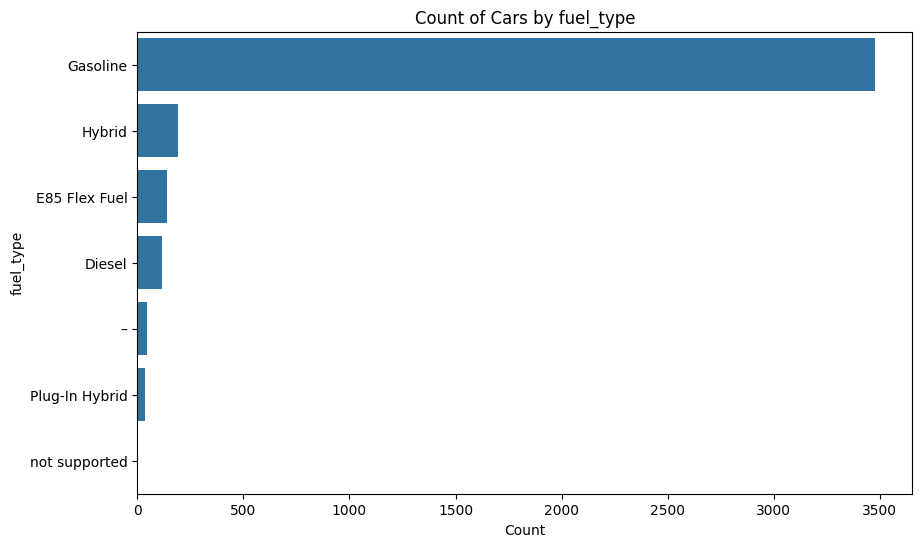

In [ ]:
# Cell 11b: Visualize 'fuel_type' (after handling missing values)
if categorical_feature_to_analyze in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=categorical_feature_to_analyze, data=df, order = df[categorical_feature_to_analyze].value_counts().index)
    plt.title(f'Count of Cars by {categorical_feature_to_analyze}')
    plt.xlabel('Count')
    plt.ylabel(categorical_feature_to_analyze)
    plt.show()

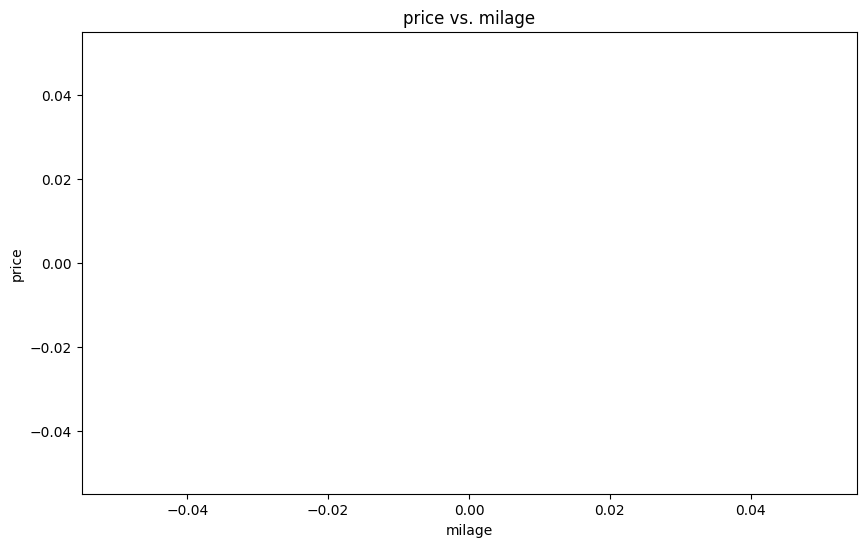

In [ ]:
# Cell 12: Explore relationship between 'milage' and 'price' (now that both are numeric)
if target_column in df.columns and df[target_column].dtype != 'object' and \
   numerical_feature_to_clean in df.columns and df[numerical_feature_to_clean].dtype != 'object':
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=numerical_feature_to_clean, y=target_column, data=df, alpha=0.5)
    plt.title(f'{target_column} vs. {numerical_feature_to_clean}')
    plt.xlabel(numerical_feature_to_clean)
    plt.ylabel(target_column)
    plt.show()
else:
    print(f"Cannot create scatter plot. Ensure '{target_column}' and '{numerical_feature_to_clean}' are cleaned and numeric.")

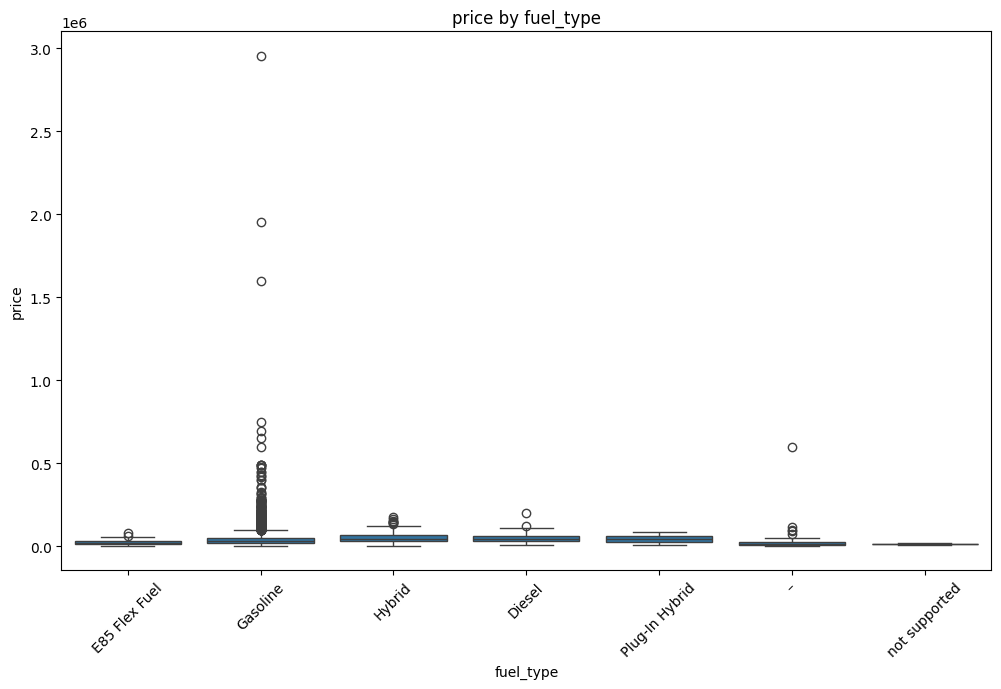

In [ ]:
# Cell 13: Explore relationship between 'fuel_type' and 'price'
if target_column in df.columns and df[target_column].dtype != 'object' and \
   categorical_feature_to_analyze in df.columns:
    plt.figure(figsize=(12, 7))
    sns.boxplot(x=categorical_feature_to_analyze, y=target_column, data=df) # .dropna() on target_column implicitly handled by boxplot if target has NaNs
    plt.title(f'{target_column} by {categorical_feature_to_analyze}')
    plt.xlabel(categorical_feature_to_analyze)
    plt.ylabel(target_column)
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Cannot create box plot. Ensure '{target_column}' is cleaned and '{categorical_feature_to_analyze}' exists.")

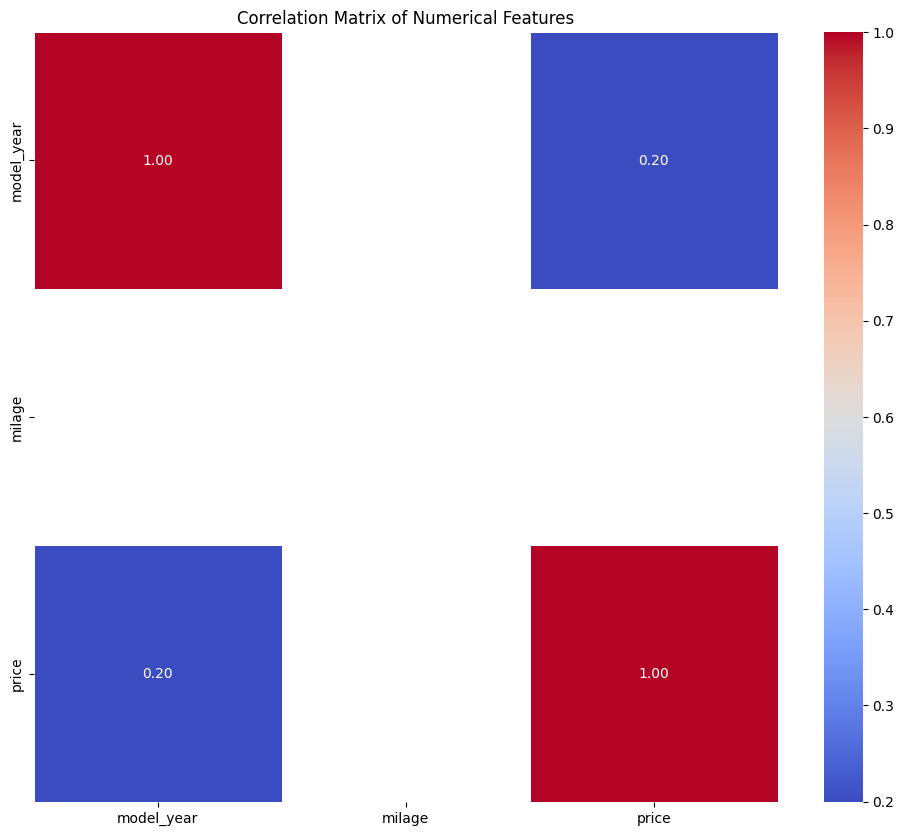

In [ ]:
# Cell 14: Correlation heatmap for numerical features (now includes cleaned 'price' and 'milage')
if target_column in df.columns: # Basic check
    plt.figure(figsize=(12, 10))
    numeric_cols = df.select_dtypes(include=['number']) # Select only numeric columns
    if not numeric_cols.empty:
        correlation_matrix = numeric_cols.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Correlation Matrix of Numerical Features')
        plt.show()
    else:
        print("No numeric columns found to compute correlation matrix. Ensure 'price' and 'milage' are cleaned.")

In [ ]:
# Cell 15: Re-check all missing values and plan for remaining ones
print("\n--- Current state of missing values ---")
print(df.isnull().sum())

print("\nColumns still needing missing value attention (based on your original df.info):")
# 'engine' (object) - Inspect unique values first: df['engine'].value_counts(dropna=False)
# 'accident' (object) - Inspect, then impute (e.g., with mode or 'Unknown'), then plan encoding
# 'clean_title' (object) - Inspect, then impute, then plan encoding
# Any NaNs introduced during numeric conversion of 'price' or 'milage' should also be handled (e.g., drop rows df.dropna(subset=['price', 'milage'], inplace=True))


--- Current state of missing values ---
brand              0
model              0
model_year         0
milage          4009
fuel_type          0
engine             0
transmission       0
ext_col            0
int_col            0
accident         113
clean_title      596
price              0
dtype: int64

Columns still needing missing value attention (based on your original df.info):


In [ ]:
# Cell 16: Example Data Type Conversion (Placeholder - you've done critical ones)
# This cell is a placeholder if other columns need type changes later.
# For example, if 'accident' or 'clean_title' are cleaned to represent boolean logic (Yes/No),
# you might map them to integers (1/0).
# df['accident_cleaned'] = df['accident'].map({'Yes': 1, 'No': 0}) # Example


'car_age' feature created:
   car_age  model_year
0       12        2013
1        4        2021
2        3        2022
3       10        2015
4        4        2021


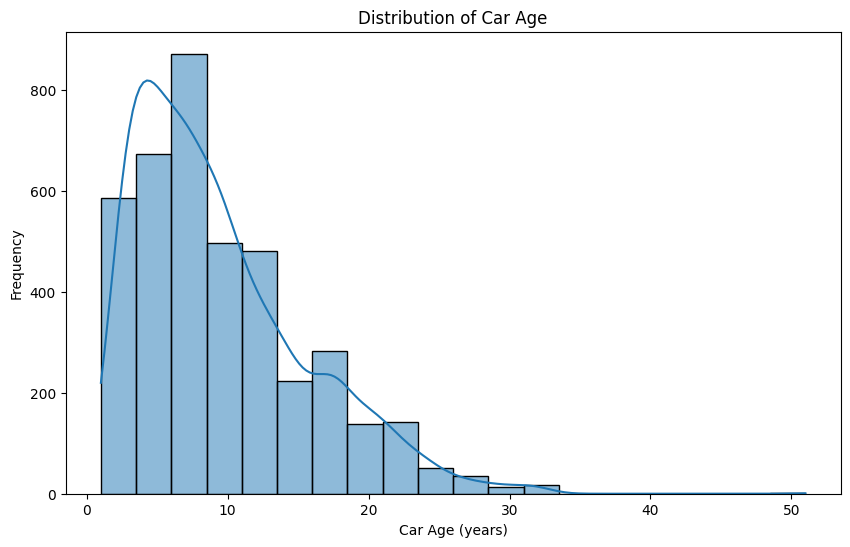

In [ ]:
# Cell 17: Example Feature Engineering: Car Age (using 'model_year')
year_column = 'model_year' # This matches your df.info() and is already int64
if year_column in df.columns and pd.api.types.is_numeric_dtype(df[year_column]):
    # Using the current real-world year at the time of running the notebook
    # For reproducibility with your project plan (Date: May 2025), you could fix it:
    # current_year = 2025
    current_year = pd.Timestamp('now').year # Uses the actual current year when code is run

    df['car_age'] = current_year - df[year_column]
    print("\n'car_age' feature created:")
    print(df[['car_age', year_column]].head())

    plt.figure(figsize=(10, 6))
    sns.histplot(df['car_age'], kde=True, bins=20) # Added bins for clarity
    plt.title('Distribution of Car Age')
    plt.xlabel('Car Age (years)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print(f"Info: '{year_column}' not found or not numeric for car age calculation.")